# Customer segmentation using clustering an classification (Simple)

https://archive.ics.uci.edu/ml/datasets/online+retail : 

이 데이터는 2010년 1월 20일 부터 2011년 9월 12일 까지의 기간동안 온라인 전자상거래 회사에서 발생한 transaction에 대한 내용입니다. 해당 회사는 UK-based non-store online 전자상거래 회사입니다.

이 데이터를 이용하여, 사용자의 행동을 분석합니다. 사용자의 행동을 분석하여, 사용자의 행동을 예측하는 모델을 만들겠습니다.

# 1. 데이터 로딩

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.listdir("./inputs")

['HR-Employee-Attrition.csv',
 'housing.csv',
 'click_rates.csv',
 'ratings_test.txt',
 'selected_reviews',
 'winequality-data.csv',
 'murders.csv',
 'scores.csv',
 'ratings_train.txt',
 'benz_train.csv',
 'e-commerce-data.csv',
 'state-population.csv',
 'four_sessions.csv',
 'superstore.xls',
 'web_page_data.csv',
 'german_credit_data.csv',
 'spam.csv']

In [9]:
# West Europe countries retail transactions
dataset=pd.read_csv("./inputs/e-commerce-data.csv",encoding = "ISO-8859-1") 
print(dataset.shape)
dataset.head()

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# 2. 데이터 전처리

In [4]:
dataset.select_dtypes(include=['object']).columns

Index(['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country'], dtype='object')

In [5]:
dataset.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [6]:
dataset['Country'].dtype

dtype('O')

In [7]:
print(dataset.duplicated().sum())

5268


In [8]:
dataset.drop_duplicates(inplace = True)
dataset.shape

(536641, 8)

In [11]:
dataset.dropna(axis = 0, subset =['CustomerID'], inplace = True)
dataset.shape

(406829, 8)

In [12]:
print(pd.DataFrame(dataset.isnull().sum()))

             0
InvoiceNo    0
StockCode    0
Description  0
Quantity     0
InvoiceDate  0
UnitPrice    0
CustomerID   0
Country      0


In [15]:
# 반품이 있는 경우
dataset[(dataset.InvoiceNo).apply(lambda x: 'C' in x)].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom


In [16]:
dataset = dataset[(dataset.InvoiceNo).apply(lambda x: 'C' not in x)]
dataset.shape

(397924, 8)

In [18]:
# 4339명의 transaction을 가지고 있다.
df_customerid_groups=dataset.groupby("CustomerID")
print(len(df_customerid_groups.groups))

4339


# 3. Clustering

In [19]:
df_cluster = pd.DataFrame(columns=['Quantity','UnitPrice','CustomerID'])

In [21]:
count=0
for k, v in (df_customerid_groups):
    df_cluster.loc[count] = [(v['Quantity'].sum()), v['UnitPrice'].sum(), k]
    count+=1
print(df_cluster.shape)
df_cluster.head()

(4339, 3)


,Quantity,UnitPrice,CustomerID
0,74215.0,1.04,12346.0
1,2458.0,481.21,12347.0
2,2341.0,178.71,12348.0
3,631.0,605.10,12349.0
4,197.0,65.30,12350.0


- Quantity
- UnitPrice

In [26]:
x = df_cluster.iloc[:, [0, 1]].values
x

array([[7.42150e+04, 1.04000e+00],
       [2.45800e+03, 4.81210e+02],
       [2.34100e+03, 1.78710e+02],
       ...,
       [1.03000e+02, 6.23900e+01],
       [1.39700e+03, 1.22093e+03],
       [1.58600e+03, 1.04550e+02]])

> Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
x = sc_x.fit_transform(x)

> K-means

In [28]:
from sklearn.cluster import KMeans

# With in cluster sum of squers(Inertia)
wcss = []

# Random하게 initial centroid를 선정하고 여러번 반복하면 좋은 성능을 낼 수 있습니다.
for i in range(1,11): 
    kmeans = KMeans(n_clusters = i, init ='k-means++',max_iter=300,n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

Text(0,0.5,'With in cluster sum of squers(WCSS)')

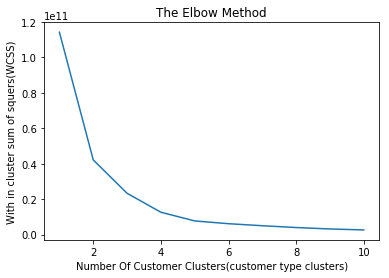

In [29]:
plt.plot(range(1,11) , wcss)
plt.title('The Elbow Method')
plt.xlabel('Number Of Customer Clusters(customer type clusters)')
plt.ylabel('With in cluster sum of squers(WCSS)')

> 시각화

In [30]:
# Elbo 포인트는 k=3 입니다.
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y_kmeans = kmeans.fit_predict(x)

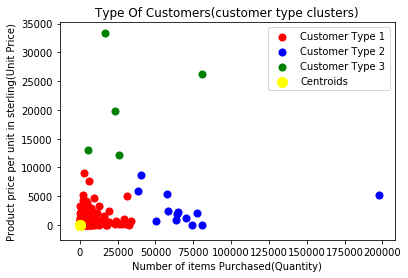

In [31]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Customer Type 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Customer Type 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Customer Type 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Type Of Customers(customer type clusters)')
plt.xlabel('Number of items Purchased(Quantity)')
plt.ylabel('Product price per unit in sterling(Unit Price)')
plt.legend()

In [32]:
kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1]

(array([-0.04883394, 14.02583104,  5.73512729]),
 array([-0.03575527,  2.87739153, 23.4184844 ]))

Text(0,0.5,'Product price per unit in sterling(Unit Price)')

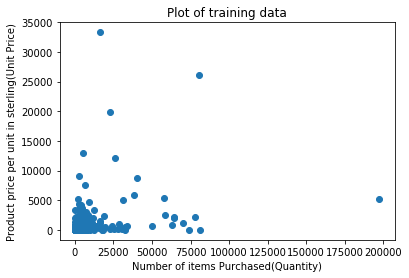

In [33]:
x=[];y=[]
for i in range(4339):
    x.append(X[i][0])
    y.append(X[i][1])
plt.scatter(x,y)
plt.title('Plot of training data')
plt.xlabel('Number of items Purchased(Quantity)')
plt.ylabel('Product price per unit in sterling(Unit Price)')